In [1]:
# Parameters
sil_combined_path = "test_sil.csv"


# Similarity Network Fusion

Authors: Casper de Visser (casper.devisser@radboudumc.nl)

## Read silhouete scores files

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sil_scores_df = pd.read_csv(sil_combined_path, delimiter='\t', header=None)
sil_scores_df.columns = ['Omics_types', 'Number_of_omics', 'Silhouette_best', 'Silhouette_second']

In [4]:
## Rewrite the lists of omics names into abbreviations, to make DF values more readable

omics_abbreviations = []

for i in sil_scores_df["Omics_types"]:
    temp_list = []
    omics_names = str(i)[2:-2]
    omics_names = omics_names.split("', '")
    for name in omics_names:
        if name == 'acylcarnitines':
            temp_list.append('Acylcarnitines')
        if name == 'aminoacids':
            temp_list.append('Amino acids')
        if name == 'fattyacids':
            temp_list.append('VLCFA')
        if name == 'proteins':
            temp_list.append('Proteomics')
        if name == 'proteomics-ipp':
            temp_list.append('ProteomicsIPP')
        if name == 'lipidomics-neg':
            temp_list.append('Lipidomics (n)')
        if name == 'lipidomics-pos':
            temp_list.append('Lipidomics (p)')
        if name == 'lipidomics-spline':
            temp_list.append('Lipidomics (spline)')
        if name == 'mRNA':
            temp_list.append('mRNA-seq')
        if name == 'miRNA-mature':
            temp_list.append('miRNA-seq')
        if name == 'EM-seq':
            temp_list.append('EM-seq')
        if name == 'miRNA-qRT-PCR':
            temp_list.append('miRNA RT-PCR')
    omics_abbreviations.append(temp_list)
    
# Store full names in variable 
sil_scores_df['Omics_types_full'] = sil_scores_df['Omics_types']

# Rewrite omics names as abbreviations for readability
sil_scores_df['Omics_types'] =  omics_abbreviations

### Omics type abbreviations

AC - Acylcarnitines <br>
AA - Amino acids <br>
FA - Very long chain fatty acids <br>
PR - Proteomics <br>
LN - Lipidomics (neg) <br>
LP - Lipidomics (pos) <br>
EM - DNA methylation <br>
MR - mRNA <br>
MI - miRNA <br>
RT - qPCR-RT miRNA <br>

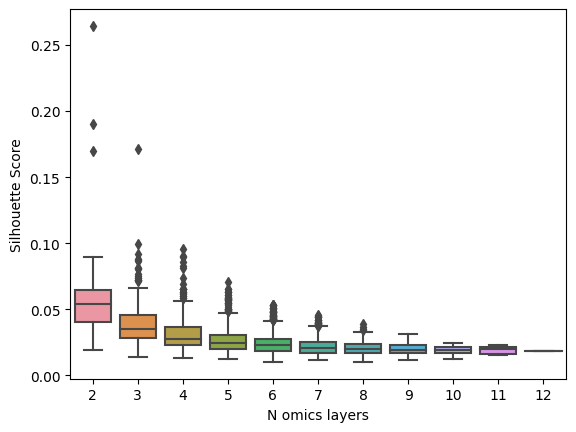

In [5]:
sil_scores_df['Silhouette_best'] = sil_scores_df['Silhouette_best'].astype(float)
bp = sns.boxplot(data=sil_scores_df, y='Silhouette_best', x='Number_of_omics')
bp.set_ylabel('Silhouette Score')
bp.set_xlabel('N omics layers')
plt.show()

In [6]:
sil_scores_df = sil_scores_df.sort_values('Silhouette_best', ascending=False)
sil_scores_df.iloc[:, :4]

,Omics_types,Number_of_omics,Silhouette_best,Silhouette_second
3648,"[Lipidomics (n), Lipidomics (p)]",2,0.264515,0.190636
3281,"[VLCFA, Lipidomics (p)]",2,0.190355,0.124540
3145,"[VLCFA, Lipidomics (n), Lipidomics (p)]",3,0.171402,0.129459
3185,"[VLCFA, Lipidomics (n)]",2,0.169988,0.159747
3607,"[Lipidomics (n), Lipidomics (p), Lipidomics (s...",3,0.099364,0.100705
...,...,...,...,...
342,"[Acylcarnitines, Amino acids, Proteomics, Lipi...",8,0.011340,0.011700
4063,"[Proteomics, mRNA-seq, miRNA-seq, EM-seq, miRN...",7,0.011336,0.011807
2394,"[Amino acids, Proteomics, Lipidomics (n), mRNA...",7,0.011255,0.013505
2403,"[Amino acids, Proteomics, Lipidomics (n), mRNA...",8,0.010287,0.011497


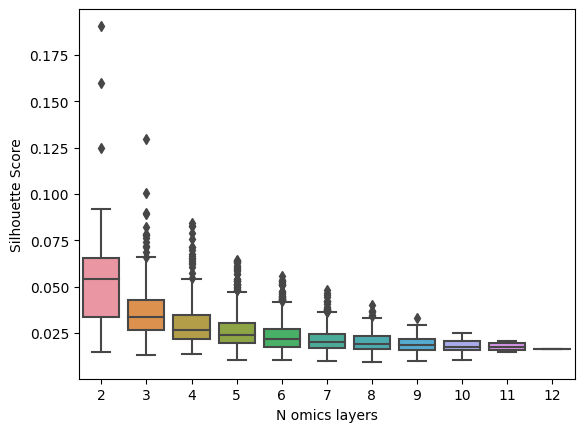

In [7]:
sil_scores_df['Silhouette_second'] = sil_scores_df['Silhouette_second'].astype(float)
bp = sns.boxplot(data=sil_scores_df, y='Silhouette_second', x='Number_of_omics')
bp.set_ylabel('Silhouette Score')
bp.set_xlabel('N omics layers')
plt.show()
#sil_scores_df.boxplot(column='Silhouette_second', by='Number_of_omics')

In [8]:
sil_scores_df_second = sil_scores_df.sort_values('Silhouette_second', ascending=False)
sil_scores_df_second.iloc[:, :4]

,Omics_types,Number_of_omics,Silhouette_best,Silhouette_second
3648,"[Lipidomics (n), Lipidomics (p)]",2,0.264515,0.190636
3185,"[VLCFA, Lipidomics (n)]",2,0.169988,0.159747
3145,"[VLCFA, Lipidomics (n), Lipidomics (p)]",3,0.171402,0.129459
3281,"[VLCFA, Lipidomics (p)]",2,0.190355,0.124540
3607,"[Lipidomics (n), Lipidomics (p), Lipidomics (s...",3,0.099364,0.100705
...,...,...,...,...
4009,"[Proteomics, Lipidomics (p), mRNA-seq, miRNA-s...",7,0.012612,0.010196
3554,"[VLCFA, Proteomics, mRNA-seq, miRNA-seq, EM-se...",8,0.013458,0.010190
450,"[Acylcarnitines, Amino acids, Proteomics, miRN...",7,0.014747,0.010050
485,"[Acylcarnitines, Amino acids, Proteomics, mRNA...",9,0.012911,0.010027


## Pairwise clustering scores

In [9]:
pairwise_df = sil_scores_df[sil_scores_df["Number_of_omics"] == 2]
#pairwise_df.iloc[1:5,]

In [10]:
## Add new columns for pairwise comparisons

omics1_list= []
omics2_list = []
for index, column in pairwise_df['Omics_types'].items():
    names = list(column)
#     print(names)
    omics1 = names[0]
    omics2 = names[1]
    omics1_list.append(omics1)
    omics2_list.append(omics2)
    
pairwise_df['omics1']  = omics1_list
pairwise_df['omics2']  = omics2_list

/tmp/ipykernel_12477/1345597778.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairwise_df['omics1']  = omics1_list
/tmp/ipykernel_12477/1345597778.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairwise_df['omics2']  = omics2_list


In [11]:
# Invert column names
omics_names = list(set(list(pairwise_df['omics1']) + list(pairwise_df['omics2'])))

# Make input dataframe for heatmap
df = pd.DataFrame(index=omics_names, columns = omics_names)
for i  in range(0,len(pairwise_df.index)):
    omics1 = (pairwise_df.iloc[i, 5])
    omics2 = (pairwise_df.iloc[i, 6])
    df.loc[omics1, omics2] = pairwise_df.iloc[i, 2]
    df.loc[omics2, omics1] = pairwise_df.iloc[i, 2]

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


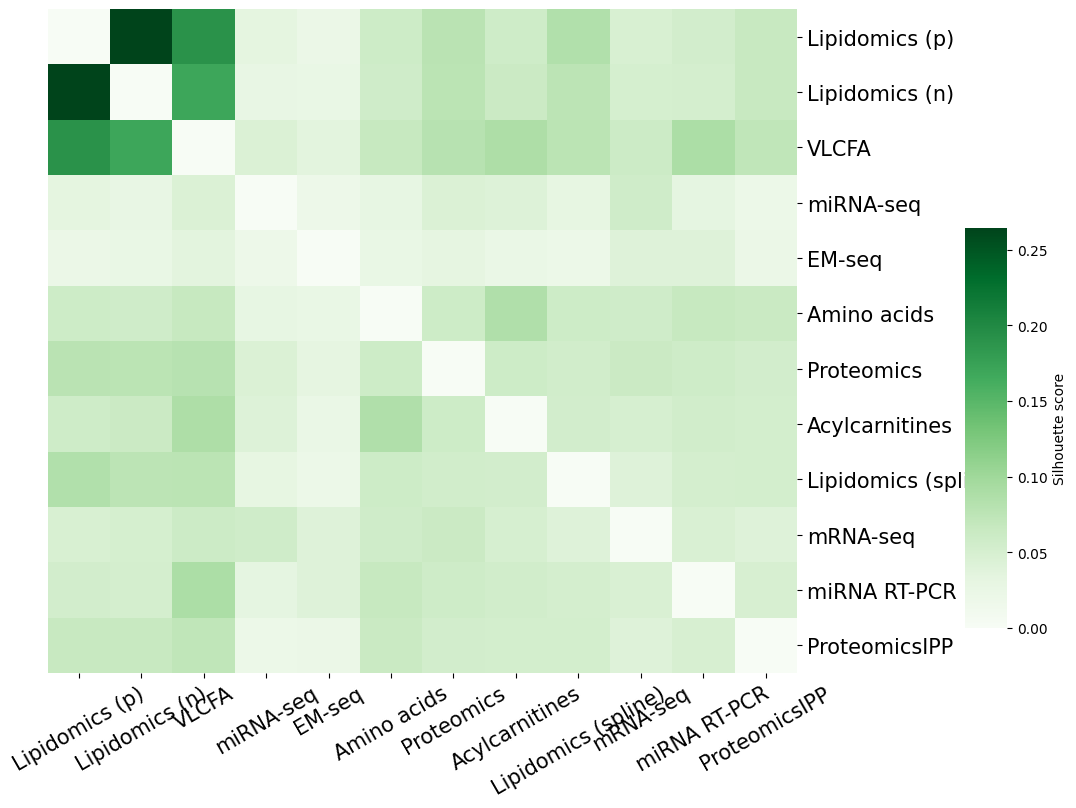

In [12]:
df = df[df.columns].astype(float)
df[df.isna()]=0 # Scores would realistically be 1

heatmap = sns.clustermap(df, 
                         cbar_kws={'label': 'Silhouette score'},
                        figsize=(14,10),
                        cmap = "Greens")
heatmap.ax_row_dendrogram.set_visible(False)
heatmap.ax_col_dendrogram.set_visible(False)
heatmap.fig.subplots_adjust(right=0.68)
heatmap.ax_cbar.set_position((0.8, .2, .03, .4))

plt.setp(heatmap.ax_heatmap.get_yticklabels(), size=15)
plt.setp(heatmap.ax_heatmap.get_xticklabels(), rotation=30, size=15)
plt.show(heatmap)

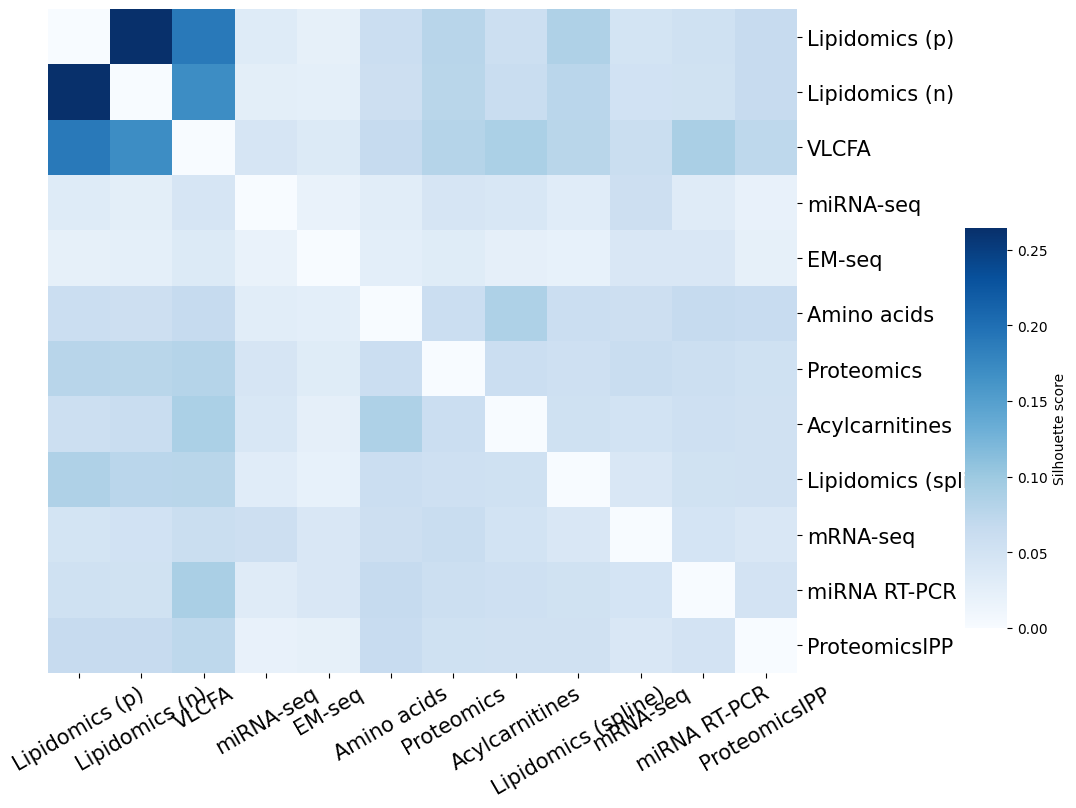

In [13]:
df = df[df.columns].astype(float)
df[df.isna()]=0 # Scores would realistically be 1

heatmap = sns.clustermap(df, 
                         cbar_kws={'label': 'Silhouette score'},
                        figsize=(14,10),
                        cmap = "Blues")
heatmap.ax_row_dendrogram.set_visible(False)
heatmap.ax_col_dendrogram.set_visible(False)
heatmap.fig.subplots_adjust(right=0.68)
heatmap.ax_cbar.set_position((0.8, .2, .03, .4))

plt.setp(heatmap.ax_heatmap.get_yticklabels(), size=15)
plt.setp(heatmap.ax_heatmap.get_xticklabels(), rotation=30, size=15)
plt.show(heatmap)

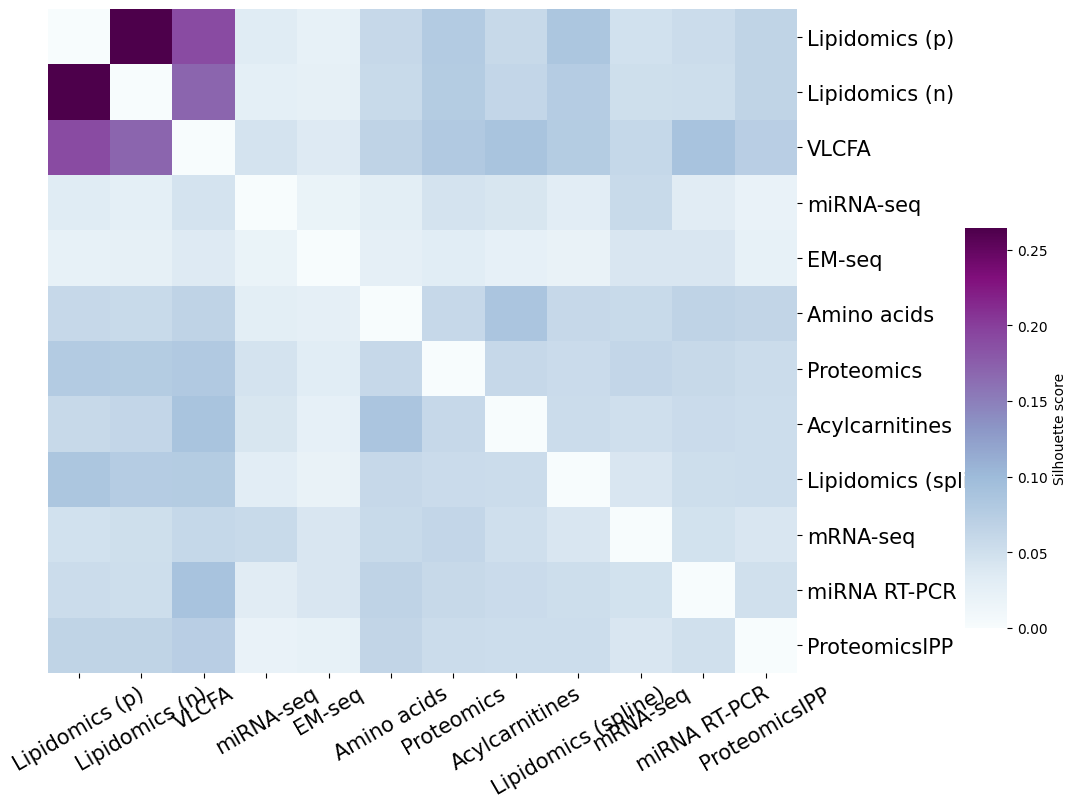

In [14]:
df = df[df.columns].astype(float)
df[df.isna()]=0 # Scores would realistically be 1

heatmap = sns.clustermap(df, 
                         cbar_kws={'label': 'Silhouette score'},
                        figsize=(14,10),
                        cmap = "BuPu")
heatmap.ax_row_dendrogram.set_visible(False)
heatmap.ax_col_dendrogram.set_visible(False)
heatmap.fig.subplots_adjust(right=0.68)
heatmap.ax_cbar.set_position((0.8, .2, .03, .4))

plt.setp(heatmap.ax_heatmap.get_yticklabels(), size=15)
plt.setp(heatmap.ax_heatmap.get_xticklabels(), rotation=30, size=15)
plt.show(heatmap)

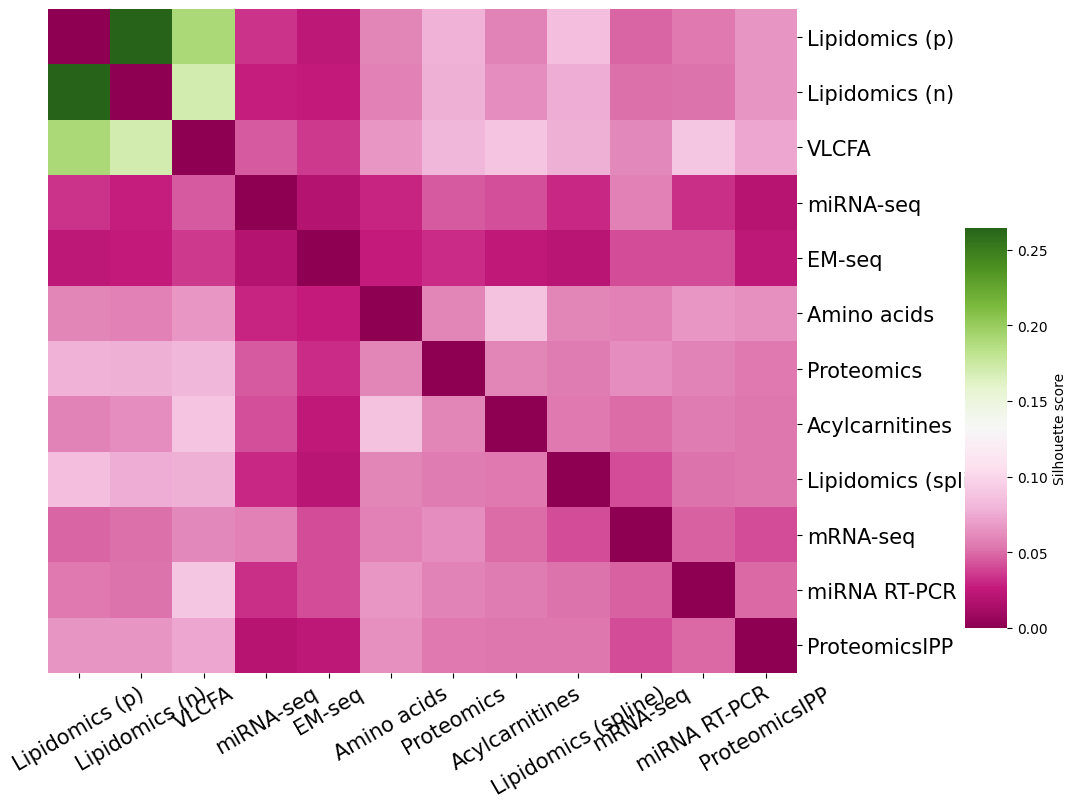

In [15]:
df = df[df.columns].astype(float)
df[df.isna()]=0 # Scores would realistically be 1

heatmap = sns.clustermap(df, 
                         cbar_kws={'label': 'Silhouette score'},
                        figsize=(14,10),
                        cmap = "PiYG")
heatmap.ax_row_dendrogram.set_visible(False)
heatmap.ax_col_dendrogram.set_visible(False)
heatmap.fig.subplots_adjust(right=0.68)
heatmap.ax_cbar.set_position((0.8, .2, .03, .4))

plt.setp(heatmap.ax_heatmap.get_yticklabels(), size=15)
plt.setp(heatmap.ax_heatmap.get_xticklabels(), rotation=30, size=15)
plt.show(heatmap)